# Summary

## CNN

# Code

In [45]:
#@title Imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
# from sklearn.metrics import roc_curve, auc, precision_recall_curve

## Load Data

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

# Data Path
train_data_path = '/content/gdrive/My Drive/W266 Final Project/datasets/train_data_binary.csv'
test_data_path = '/content/gdrive/My Drive/W266 Final Project/datasets/test_data_binary.csv'

# Load Raw Data
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

Mounted at /content/gdrive


## Data Overview

In [3]:
train_data.head()

,Comment,Labels
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [4]:
train_data.shape

(159571, 2)

array([[<Axes: title={'center': 'Labels'}>]], dtype=object)

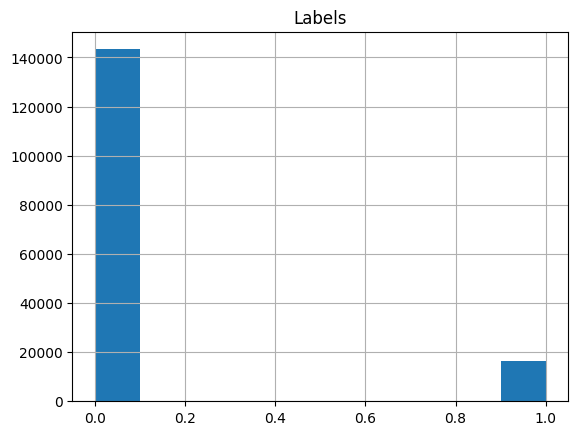

In [5]:
train_data.hist()

In [6]:
train_data['Labels'].value_counts()

Labels
0    143346
1     16225
Name: count, dtype: int64

In [7]:
#random undersampling with the same ratio
#check number of values per class
print("Before random undersampling", train_data['Labels'].value_counts())
# Splitting the data into train and test sets, but in this case, we'll only use the train set
train_subset, _ = train_test_split(train_data, test_size=0.6, random_state=42)

# If you want to reset the index of the subset
train_subset.reset_index(drop=True, inplace=True)
train_under = train_subset
print("After random undersampling", train_under['Labels'].value_counts())

Before random undersampling Labels
0    143346
1     16225
Name: count, dtype: int64
After random undersampling Labels
0    57280
1     6548
Name: count, dtype: int64


In [8]:
test_data.head()

,Comment,Labels
0,Thank you for understanding. I think very high...,0
1,:Dear god this site is horrible.,0
2,"""::: Somebody will invariably try to add Relig...",0
3,""" \n\n It says it right there that it IS a typ...",0
4,""" \n\n == Before adding a new product to the l...",0


In [9]:
test_data.shape

(63978, 2)

array([[<Axes: title={'center': 'Labels'}>]], dtype=object)

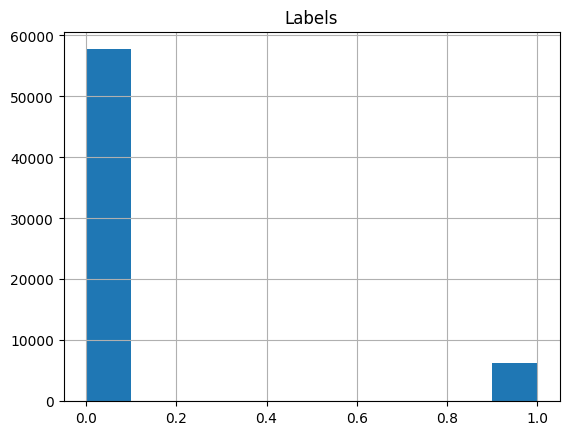

In [10]:
test_data.hist()

In [11]:
test_data['Labels'].value_counts()

Labels
0    57735
1     6243
Name: count, dtype: int64

In [12]:
#random undersampling with the same ratio
#check number of values per class
print("Before random undersampling", test_data['Labels'].value_counts())
# Splitting the data into train and test sets, but in this case, we'll only use the train set
test_subset, _ = train_test_split(test_data, test_size=0.6, random_state=42)

# If you want to reset the index of the subset
test_subset.reset_index(drop=True, inplace=True)
test_under = test_subset
print("After random undersampling", test_under['Labels'].value_counts())

Before random undersampling Labels
0    57735
1     6243
Name: count, dtype: int64
After random undersampling Labels
0    23130
1     2461
Name: count, dtype: int64


## Create train_texts, train_labels, valid_texts, valid_labels, test_texts, and test_labels

In [13]:
train_data = train_under
train_data.reset_index(drop=True, inplace=True)

In [14]:
train_texts = train_data['Comment']
train_texts

0        "\n\n Reverting Vandalism \n\nIs there a hot k...
1        "\n{{unblock | reason= \nDerogatory comments a...
2        Is it also a cheap version of the supernova in...
3        Legally, there are no rules which state any ge...
4          I forgot how regex's are entered in AWB though.
                               ...                        
63823    REDIRECT Talk:John Loveday (experimental physi...
63824    Back it up. Post the line here with the refere...
63825    I won't stop that. Sometimes Germanic equals G...
63826    "\n\n British Bands?  \n\nI think you've mista...
63827    You are WRONG. \n\nJustin Thompson is mentione...
Name: Comment, Length: 63828, dtype: object

In [15]:
train_labels = train_data['Labels']
train_labels

0        0
1        0
2        0
3        0
4        0
        ..
63823    0
63824    0
63825    1
63826    0
63827    0
Name: Labels, Length: 63828, dtype: int64

In [16]:
test_texts = test_under['Comment']
test_texts

0        Clayton High School \n Hello, I recently remov...
1        " \n\n  Please do not vandalize pages, as you ...
2                                  ::Learn to spell, yank.
3        " \n : As a member of the community, I have re...
4        == Eschew Obfuscation == \n\n If you're intere...
                               ...                        
25586    :Are you proposing something here or opining o...
25587    :I don't think there is sufficient reason to e...
25588    " \n\n == The harm of articles == \n\n Accordi...
25589    " \n\n == Local names 2nd time == \n\n  \n\n Y...
25590                fuckin super gay ass bitch headAlamos
Name: Comment, Length: 25591, dtype: object

In [17]:
test_labels = test_under['Labels']
test_labels

0        0
1        0
2        0
3        0
4        0
        ..
25586    0
25587    0
25588    0
25589    0
25590    1
Name: Labels, Length: 25591, dtype: int64

## CountVectorizer

In [18]:
# Vectorize the text using TF-IDF
vectorizer = CountVectorizer()
train_feature_vectors = vectorizer.fit_transform(train_texts)
test_feature_vectors = vectorizer.transform(test_texts)

In [19]:
# Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(train_feature_vectors, train_labels)

LogisticRegression(max_iter=1000)

In [20]:
predictions = logreg.predict(test_feature_vectors)
predictions

array([0, 0, 0, ..., 0, 0, 1])

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96     23130
           1       0.57      0.72      0.64      2461

    accuracy                           0.92     25591
   macro avg       0.77      0.83      0.80     25591
weighted avg       0.93      0.92      0.93     25591

ROC AUC Score: 0.8296663576523556


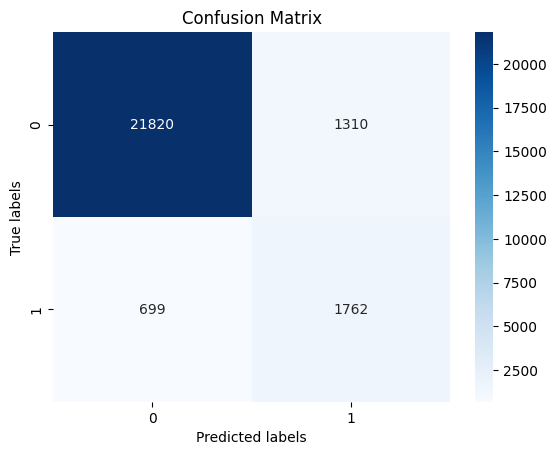

In [21]:
# Evaluate the model
print('Classification Report:')
print(classification_report(test_labels, predictions))

print("ROC AUC Score:", roc_auc_score(test_labels, predictions))

# Plot confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## TfidfVectorizer

In [40]:
# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
train_texts_tfidf = vectorizer.fit_transform(train_texts)
test_texts_tfidf = vectorizer.transform(test_texts)

In [41]:
# from sklearn.feature_extraction.text import TfidfTransformer
# tfidf_transformer = TfidfTransformer()
# train_texts_tfidf = tfidf_transformer.fit_transform(train_feature_vectors)
# test_texts_tfidf = tfidf_transformer.transform(test_feature_vectors)

In [42]:
# Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(train_texts_tfidf, train_labels)

LogisticRegression(max_iter=1000)

In [43]:
predictions = logreg.predict(test_texts_tfidf)
predictions

array([0, 0, 0, ..., 0, 0, 1])

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     23130
           1       0.70      0.61      0.65      2461

    accuracy                           0.94     25591
   macro avg       0.83      0.79      0.81     25591
weighted avg       0.93      0.94      0.94     25591

ROC AUC Score: 0.7913126573069938


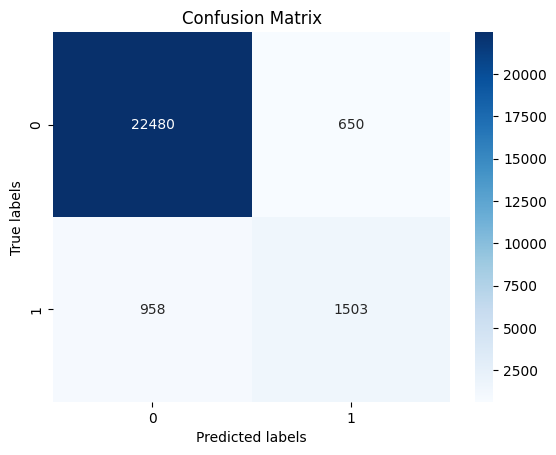

In [44]:
# Evaluate the model
print('Classification Report:')
print(classification_report(test_labels, predictions))

print("ROC AUC Score:", roc_auc_score(test_labels, predictions))

# Plot confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()